## *Instalar Dependencias*

In [1]:
!pip install retina-face

## **Landmarks Retina Face**

Saving test1.png to test1.png
Imagen subida: test1.png


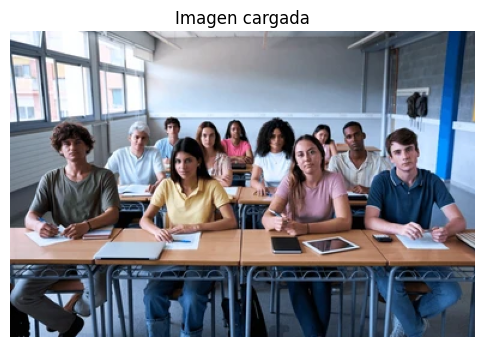

Rostros detectados: 11
face_1: score=1.000, box=[np.int64(137), np.int64(101), np.int64(155), np.int64(123)]
face_2: score=1.000, box=[np.int64(100), np.int64(82), np.int64(114), np.int64(98)]
face_3: score=0.999, box=[np.int64(158), np.int64(80), np.int64(171), np.int64(97)]
face_4: score=0.999, box=[np.int64(278), np.int64(79), np.int64(294), np.int64(99)]
face_5: score=0.998, box=[np.int64(237), np.int64(92), np.int64(259), np.int64(118)]
face_6: score=0.998, box=[np.int64(42), np.int64(86), np.int64(62), np.int64(107)]
face_7: score=0.998, box=[np.int64(317), np.int64(91), np.int64(339), np.int64(116)]
face_8: score=0.997, box=[np.int64(183), np.int64(77), np.int64(192), np.int64(88)]
face_9: score=0.997, box=[np.int64(215), np.int64(81), np.int64(228), np.int64(98)]
face_10: score=0.996, box=[np.int64(130), np.int64(76), np.int64(140), np.int64(87)]
face_11: score=0.994, box=[np.int64(254), np.int64(82), np.int64(264), np.int64(93)]


In [36]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import csv
from retinaface import RetinaFace
from google.colab import files

uploaded = files.upload()  # Selecciona la imagen
image_path = list(uploaded.keys())[0]
print("Imagen subida:", image_path)

# Mostrar imagen original
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title("Imagen cargada")
plt.axis("off")
plt.show()

# Deteccion de rostros
detections = RetinaFace.detect_faces(image_path)

print("Rostros detectados:", len(detections))
for key, value in detections.items():
    print(f"{key}: score={value['score']:.3f}, box={value['facial_area']}")

output_dir = "faces_cropped"
os.makedirs(output_dir, exist_ok=True)
csv_dir = "landmarks_csv"
os.makedirs(csv_dir, exist_ok=True)

Guardado crop: faces_cropped/face_1.jpg | Guardado landmarks: landmarks_csv/face_1.csv
Guardado crop: faces_cropped/face_2.jpg | Guardado landmarks: landmarks_csv/face_2.csv
Guardado crop: faces_cropped/face_3.jpg | Guardado landmarks: landmarks_csv/face_3.csv
Guardado crop: faces_cropped/face_4.jpg | Guardado landmarks: landmarks_csv/face_4.csv
Guardado crop: faces_cropped/face_5.jpg | Guardado landmarks: landmarks_csv/face_5.csv
Guardado crop: faces_cropped/face_6.jpg | Guardado landmarks: landmarks_csv/face_6.csv
Guardado crop: faces_cropped/face_7.jpg | Guardado landmarks: landmarks_csv/face_7.csv
Guardado crop: faces_cropped/face_8.jpg | Guardado landmarks: landmarks_csv/face_8.csv
Guardado crop: faces_cropped/face_9.jpg | Guardado landmarks: landmarks_csv/face_9.csv
Guardado crop: faces_cropped/face_10.jpg | Guardado landmarks: landmarks_csv/face_10.csv
Guardado crop: faces_cropped/face_11.jpg | Guardado landmarks: landmarks_csv/face_11.csv

Total de crops guardados: 11


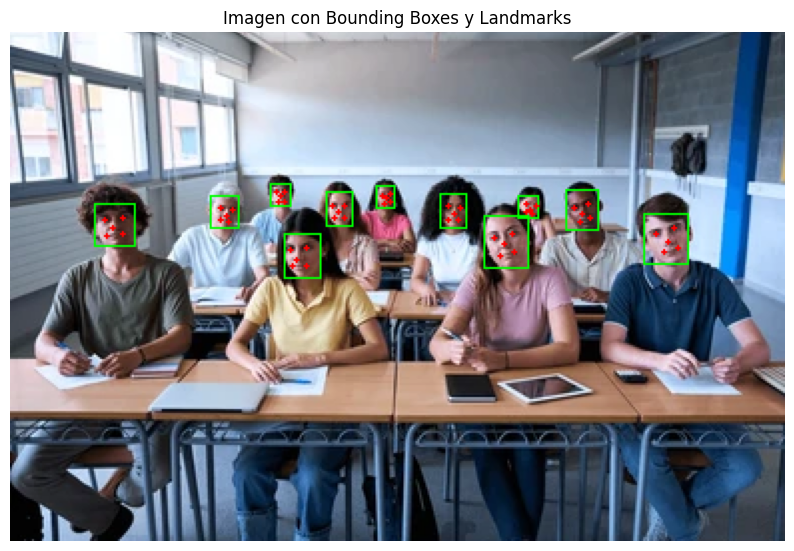

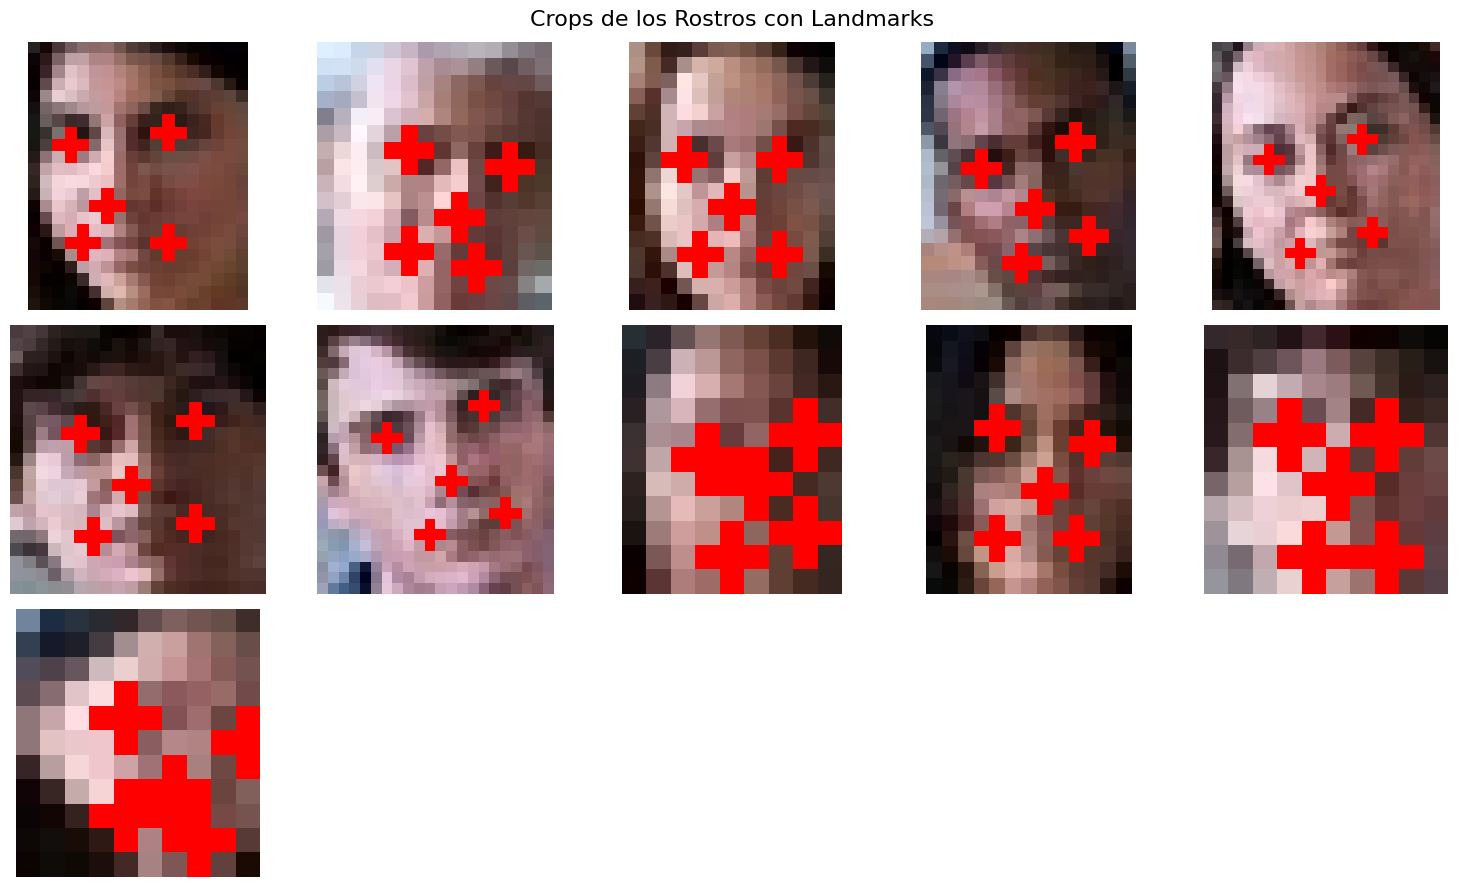

In [38]:
# Procesar cada rostro
orig = cv2.imread(image_path)
img_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

crops = []

for i, (key, face) in enumerate(detections.items(), start=1):
    x1, y1, x2, y2 = [int(v) for v in face["facial_area"]]

    # Dibujar rectangulo (bounding box)
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 1)
    # cv2.putText(img_rgb, f"Face {i}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2, cv2.LINE_AA)

    # Dibujar landmarks
    landmarks = face["landmarks"]
    for name, (lx, ly) in landmarks.items():
        lx, ly = int(lx), int(ly)
        cv2.circle(img_rgb, (lx, ly), 1, (255, 0, 0), -1)

    # Guardar crop
    face_crop = orig[y1:y2, x1:x2]
    crops.append(cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB))
    crop_filename = f"face_{i}.jpg"
    out_path = os.path.join(output_dir, crop_filename)
    cv2.imwrite(out_path, face_crop)

    # Guardar landmarks en CSV
    csv_filename = f"face_{i}.csv"
    csv_path = os.path.join(csv_dir, csv_filename)

    with open(csv_path, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["landmark", "x", "y"])
        for name, (lx, ly) in landmarks.items():
            writer.writerow([name, lx, ly])

    print(f"Guardado crop: {out_path}", end=" | ")
    print(f"Guardado landmarks: {csv_path}")

print(f"\nTotal de crops guardados: {len(crops)}")

# --------------------------
# Mostrar imagen con boxes y landmarks
# --------------------------
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Imagen con Bounding Boxes y Landmarks")
plt.show()

# --------------------------
# Mostrar los crops en una cuadrícula con landmarks
# --------------------------
if crops:
    cols = min(len(crops), 5)
    rows = int(np.ceil(len(crops) / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = np.array(axes).reshape(-1)

    for ax, (crop, face) in zip(axes, zip(crops, detections.values())):
        # Dibujar los landmarks sobre el crop
        crop_with_landmarks = crop.copy()

        # Como los landmarks están en coordenadas de la imagen original,
        # los transformamos a coordenadas relativas al crop
        x1, y1, x2, y2 = [int(v) for v in face["facial_area"]]

        for name, (lx, ly) in face["landmarks"].items():
            # Ajustar a coordenadas relativas al crop
            lx_rel = int(lx - x1)
            ly_rel = int(ly - y1)

            # Dibujar punto
            cv2.circle(crop_with_landmarks, (lx_rel, ly_rel), 1, (255, 0, 0), -1)

        # Mostrar el crop con landmarks
        ax.imshow(crop_with_landmarks)
        ax.axis('off')

    # Ocultar subplots sobrantes
    for ax in axes[len(crops):]:
        ax.axis('off')

    plt.suptitle("Crops de los Rostros con Landmarks", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No se detectaron rostros.")

## **Face Alignment**

Rostros detectados: 11
Guardado: faces_aligned/face_1.jpg
Guardado: faces_aligned/face_2.jpg
Guardado: faces_aligned/face_3.jpg
Guardado: faces_aligned/face_4.jpg
Guardado: faces_aligned/face_5.jpg
Guardado: faces_aligned/face_6.jpg
Guardado: faces_aligned/face_7.jpg
Guardado: faces_aligned/face_8.jpg
Guardado: faces_aligned/face_9.jpg
Guardado: faces_aligned/face_10.jpg
Guardado: faces_aligned/face_11.jpg

-> Se han guardado 11 rostros alineados en 'faces_aligned'


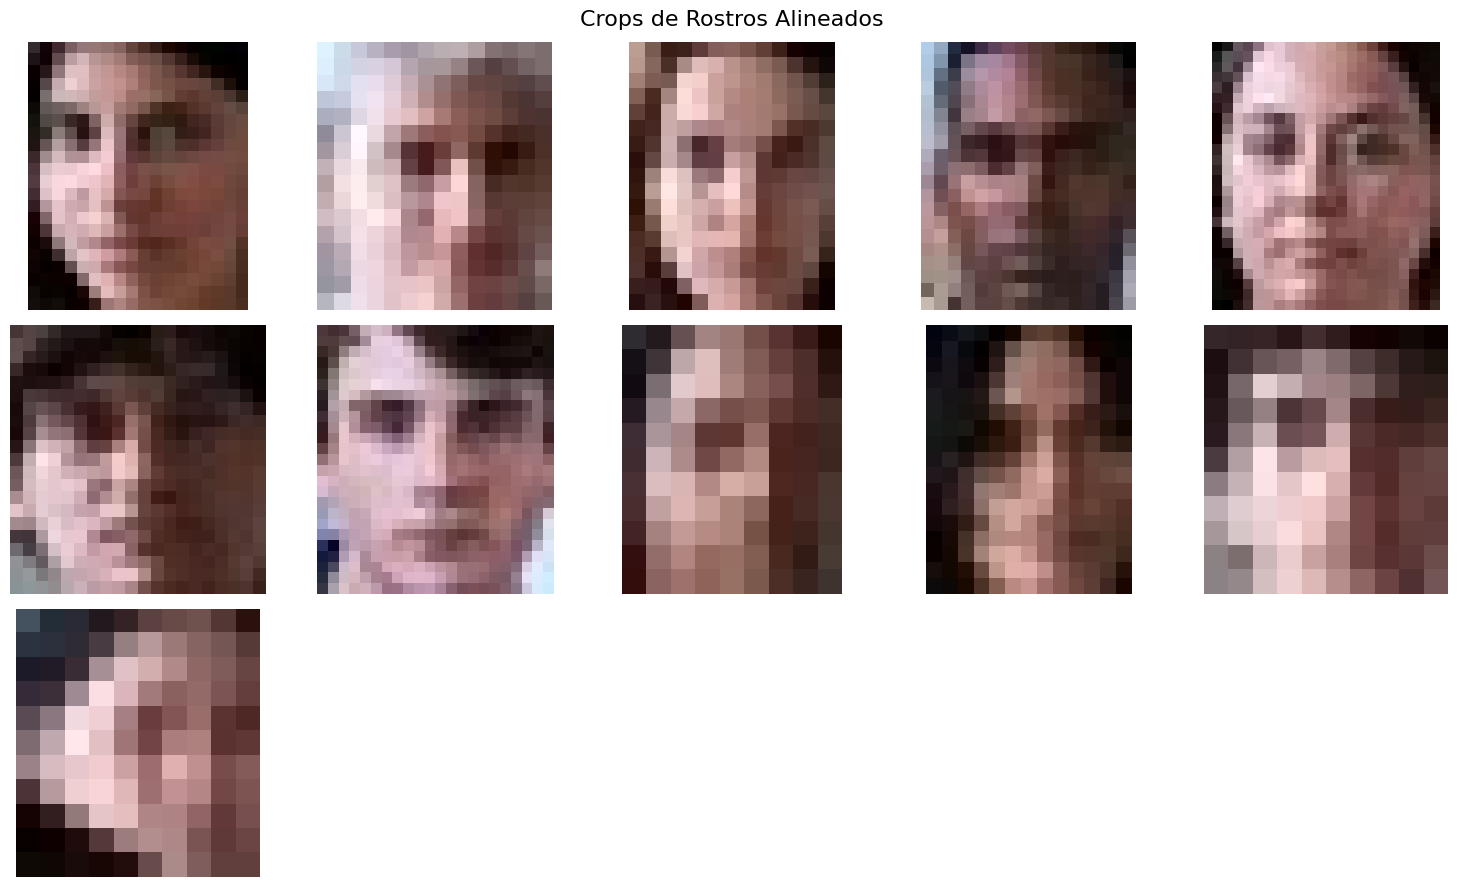

In [39]:
import os
import cv2
import numpy as np
from retinaface import RetinaFace
from google.colab import files
import matplotlib.pyplot as plt
import math

# Imagen
image_path = "test1.png"
output_dir = "faces_aligned"
os.makedirs(output_dir, exist_ok=True)

# Función para alinear rostro
def align_face(image, landmarks, desired_size=(224, 224)):
    """
    Alinea el rostro usando los landmarks de los ojos, asegurando que el menton
    quede hacia abajo.
    """
    left_eye = np.array(landmarks['left_eye'])
    right_eye = np.array(landmarks['right_eye'])

    # Centro entre ojos
    eye_center = ((left_eye[0] + right_eye[0]) / 2,
                  (left_eye[1] + right_eye[1]) / 2)

    # Calcular angulo de la línea de los ojos
    dy = right_eye[1] - left_eye[1]
    dx = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dy, dx))

    # Ajustar angulo para evitar que el rostro quede de cabeza
    if angle < -90:
        angle += 180
    elif angle > 90:
        angle -= 180

    # Matriz de rotacion
    M = cv2.getRotationMatrix2D(eye_center, angle, 1.0)

    # Rotar la imagen
    rotated = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)

    return rotated

# ============================
# Deteccion de rostros
# ============================
detections = RetinaFace.detect_faces(image_path)
print(f"Rostros detectados: {len(detections)}")

orig = cv2.imread(image_path)

# ============================
# Procesar cada rostro
# ============================
crop_paths = []

for i, (key, face) in enumerate(detections.items(), start=1):
    x1, y1, x2, y2 = [int(v) for v in face["facial_area"]]

    # Alinear rostro
    aligned_img = align_face(orig, face["landmarks"])

    # Crop del rostro alineado
    aligned_crop = aligned_img[y1:y2, x1:x2]

    # Guardar crop
    crop_path = os.path.join(output_dir, f"face_{i}.jpg")
    cv2.imwrite(crop_path, aligned_crop)
    crop_paths.append(crop_path)

    print(f"Guardado: {crop_path}")

print(f"\n-> Se han guardado {len(crop_paths)} rostros alineados en '{output_dir}'")

# ============================
# Mostrar los crops alineados
# ============================
if crop_paths:
    cols = 5
    rows = math.ceil(len(crop_paths) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = axes.flatten()

    for ax, path in zip(axes, crop_paths):
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis('off')

    # Ocultar ejes sobrantes
    for ax in axes[len(crop_paths):]:
        ax.axis('off')

    plt.suptitle("Crops de Rostros Alineados", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("No se detectaron rostros para mostrar.")

## **Alignment + Crop: Own Dataset**

🔎 Se encontraron 12 imágenes en 'photos_unsa'

Procesando: braulio_front.jpeg
Guardado: faces_aligned_unsa/braulio_front_face_1.jpg

Procesando: lu_front.jpeg
Guardado: faces_aligned_unsa/lu_front_face_1.jpg

Procesando: kevin_left.png
Guardado: faces_aligned_unsa/kevin_left_face_1.jpg

Procesando: kevin_front.png
Guardado: faces_aligned_unsa/kevin_front_face_1.jpg

Procesando: braulio_right.png
Guardado: faces_aligned_unsa/braulio_right_face_1.jpg

Procesando: kevin_right.png
Guardado: faces_aligned_unsa/kevin_right_face_1.jpg

Procesando: nelzon_left.png
Guardado: faces_aligned_unsa/nelzon_left_face_1.jpg

Procesando: nelzon_right.png
Guardado: faces_aligned_unsa/nelzon_right_face_1.jpg

Procesando: braulio_left.png
Guardado: faces_aligned_unsa/braulio_left_face_1.jpg

Procesando: nelzon_front.png
Guardado: faces_aligned_unsa/nelzon_front_face_1.jpg

Procesando: lu_right.png
Guardado: faces_aligned_unsa/lu_right_face_1.jpg

Procesando: lu_left.png
Guardado: faces_aligned_unsa/lu_left

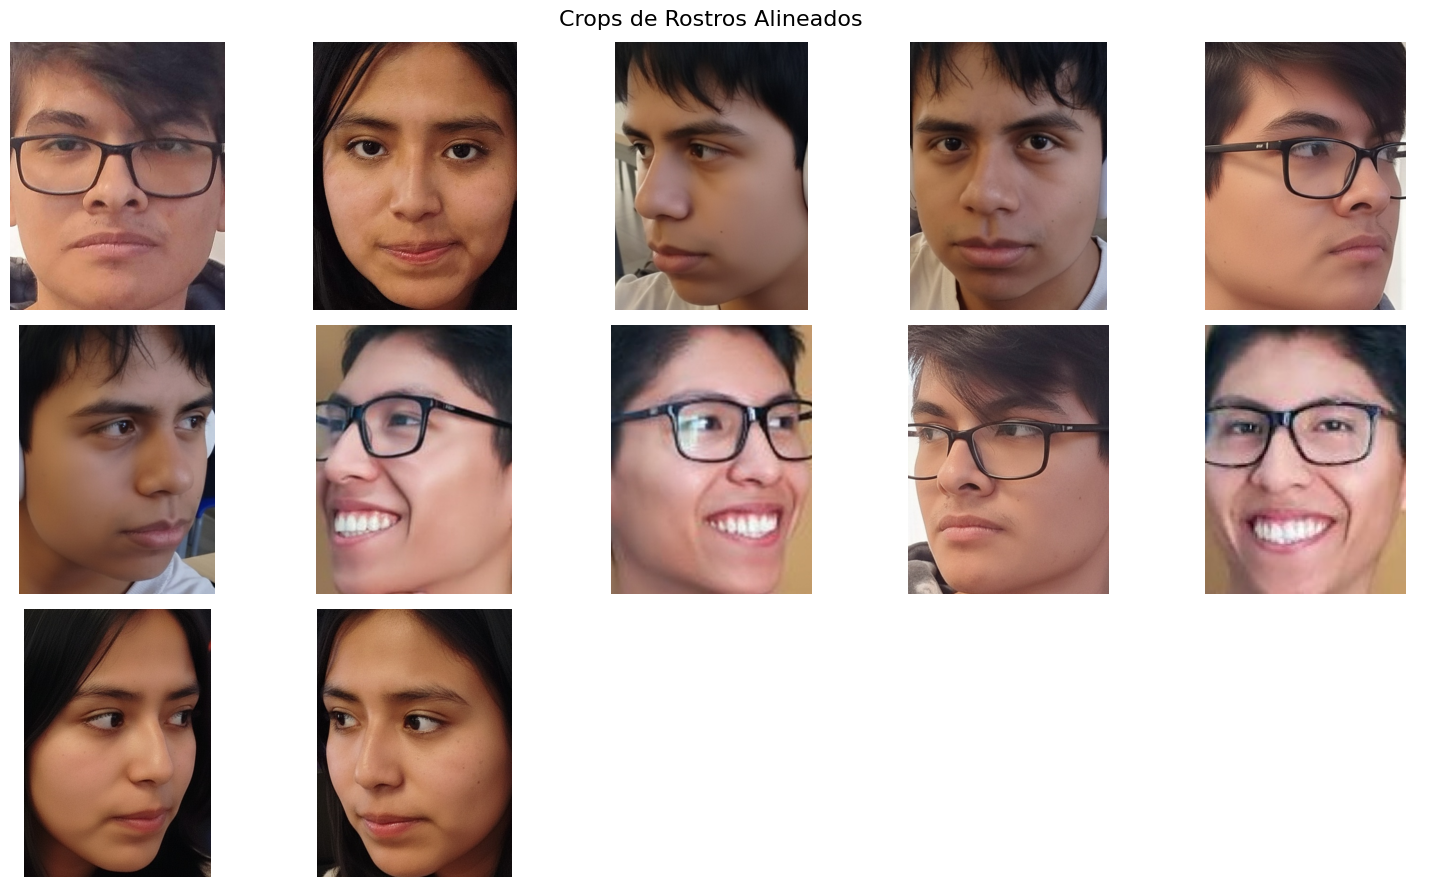

In [40]:
import os
import cv2
import numpy as np
from retinaface import RetinaFace
import matplotlib.pyplot as plt
import math

input_dir = "photos_unsa"
output_dir = "faces_aligned_unsa"
os.makedirs(output_dir, exist_ok=True)

# Extensiones validas
valid_exts = (".jpg", ".jpeg", ".png")

# Procesar todas las imágenes
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(valid_exts)]
print(f"🔎 Se encontraron {len(image_files)} imágenes en '{input_dir}'")

all_crops = []  # para mostrar despues

for img_name in image_files:
    img_path = os.path.join(input_dir, img_name)
    print(f"\nProcesando: {img_name}")

    # Leer imagen original
    orig = cv2.imread(img_path)

    # Detectar rostros
    detections = RetinaFace.detect_faces(img_path)
    if not isinstance(detections, dict):
        print(f"No se detectaron rostros en {img_name}")
        continue

    # Procesar cada rostro
    for i, (key, face) in enumerate(detections.items(), start=1):
        # Alinear rostro
        aligned_img = align_face(orig, face["landmarks"])

        # Coordenadas del rostro
        x1, y1, x2, y2 = [int(v) for v in face["facial_area"]]

        # Ajustar coordenadas si están fuera de los límites
        x1 = max(x1, 0)
        y1 = max(y1, 0)
        x2 = min(x2, aligned_img.shape[1])
        y2 = min(y2, aligned_img.shape[0])

        # Crop del rostro alineado
        aligned_crop = aligned_img[y1:y2, x1:x2]

        # Guardar crop
        crop_name = f"{os.path.splitext(img_name)[0]}_face_{i}.jpg"
        crop_path = os.path.join(output_dir, crop_name)
        cv2.imwrite(crop_path, aligned_crop)
        all_crops.append(crop_path)

        print(f"Guardado: {crop_path}")

print(f"\nProceso completado. Se guardaron {len(all_crops)} rostros en '{output_dir}'")

# ============================
# Mostrar los crops
# ============================
if all_crops:
    cols = 5
    rows = math.ceil(len(all_crops) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes = axes.flatten()

    for ax, path in zip(axes, all_crops):
        img = cv2.imread(path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis('off')

    for ax in axes[len(all_crops):]:
        ax.axis('off')

    plt.suptitle("Crops de Rostros Alineados", fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No hay crops para mostrar.")

In [35]:
!zip -r faces_aligned_unsa.zip faces_aligned_unsa

  adding: faces_aligned_unsa/ (stored 0%)
  adding: faces_aligned_unsa/braulio_right_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/kevin_left_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/kevin_right_face_1.jpg (deflated 10%)
  adding: faces_aligned_unsa/lu_left_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/lu_front_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/kevin_right_face_2.jpg (deflated 0%)
  adding: faces_aligned_unsa/kevin_front_face_2.jpg (deflated 12%)
  adding: faces_aligned_unsa/nelzon_left_face_1.jpg (deflated 1%)
  adding: faces_aligned_unsa/.ipynb_checkpoints/ (stored 0%)
  adding: faces_aligned_unsa/lu_right_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/kevin_left_face_2.jpg (deflated 10%)
  adding: faces_aligned_unsa/braulio_left_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/nelzon_right_face_1.jpg (deflated 1%)
  adding: faces_aligned_unsa/kevin_front_face_1.jpg (deflated 0%)
  adding: faces_aligned_unsa/nelzon_front_fa